In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3 
EPOCHS = 5

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(

    "D:\Deep Learning\datasets",
     shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE   
    
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
len(dataset)

68

(256, 256, 3)


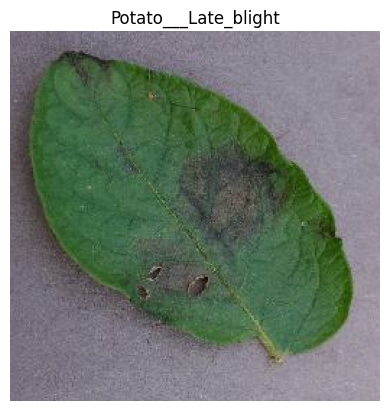

In [7]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")
    print(image_batch[0].shape)
    


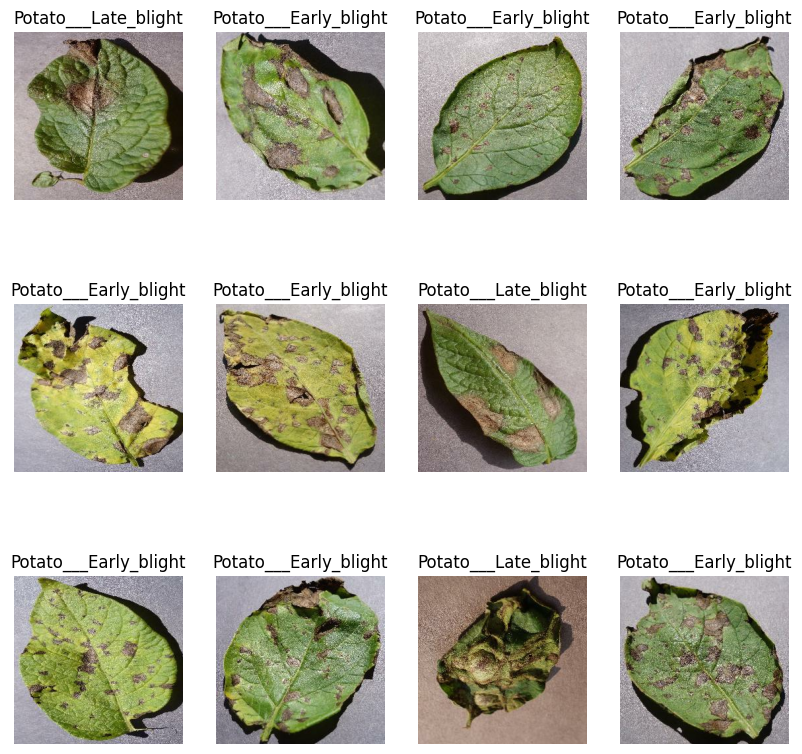

In [8]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range (12):
     ax = plt.subplot(3,4,i+1)
     plt.imshow(image_batch[i].numpy().astype("uint8"))
     plt.title(class_names[label_batch[i]])
     plt.axis("off")
    
    


In [9]:
train = 0.8
len(dataset)*train

54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [11]:
test = 0.2
len(dataset)*test

13.600000000000001

In [12]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [13]:
val = 0.1
len(dataset)*val

6.800000000000001

In [14]:
val_ds = dataset.take(6)
len(val_ds)

6

In [15]:
trian_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)


In [16]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(0.1/255)
])

In [17]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.1)
])

In [18]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([

    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation= 'softmax'),
])

model.build(input_shape=input_shape)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (32, 516128)              0         
                                                                 
 dense (Dense)               (32, 64)                  33032256  
                                                      

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [21]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)


Epoch 1/5
54/54 [==============================] - 82s 1s/step - loss: 113.6353 - accuracy: 0.5203 - val_loss: 2.2292 - val_accuracy: 0.5573
Epoch 2/5
54/54 [==============================] - 69s 1s/step - loss: 0.8547 - accuracy: 0.7442 - val_loss: 0.5943 - val_accuracy: 0.7552
Epoch 3/5
54/54 [==============================] - 70s 1s/step - loss: 1.0740 - accuracy: 0.7546 - val_loss: 0.8114 - val_accuracy: 0.8073
Epoch 4/5
54/54 [==============================] - 66s 1s/step - loss: 0.5936 - accuracy: 0.8293 - val_loss: 0.4325 - val_accuracy: 0.8698
Epoch 5/5
54/54 [==============================] - 66s 1s/step - loss: 0.3552 - accuracy: 0.8906 - val_loss: 0.3295 - val_accuracy: 0.8958


In [22]:
model.evaluate(test_ds)

14/14 [==============================] - 6s 264ms/step - loss: 0.3742 - accuracy: 0.9033


[0.37415453791618347, 0.9033018946647644]

In [23]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
len(history.history['accuracy'])

5

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

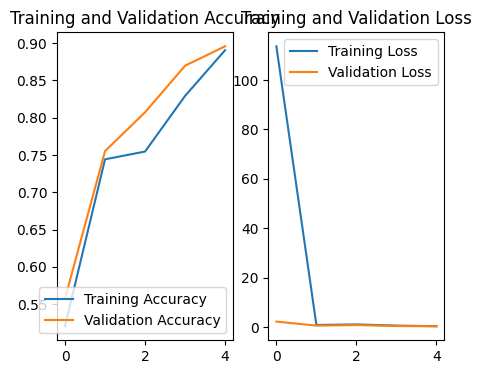

In [27]:
plt.figure(figsize=(5, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

first image to pridect
first image actual label: Potato___Early_blight
1/1 [==============================] - 0s 407ms/step
predicted_lable: Potato___Early_blight


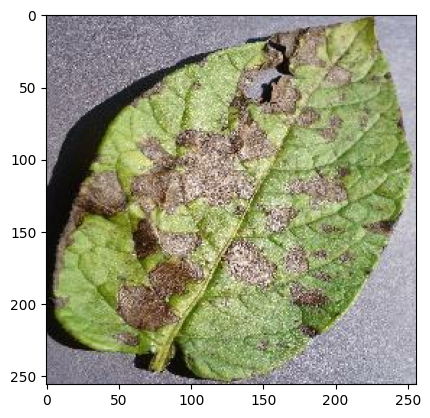

In [29]:
import numpy as np
for image_batch, label_batch in train_ds.take(1):
   first_image = (image_batch[0].numpy().astype('uint8'))
first_label = label_batch[0].numpy()

print("first image to pridect")
plt.imshow(first_image)
print("first image actual label:",class_names[first_label])

batch_pridection = model.predict(image_batch)    
print("predicted_lable:",class_names[np.argmax(batch_pridection[0])])

1/1 [==============================] - 0s 43ms/step


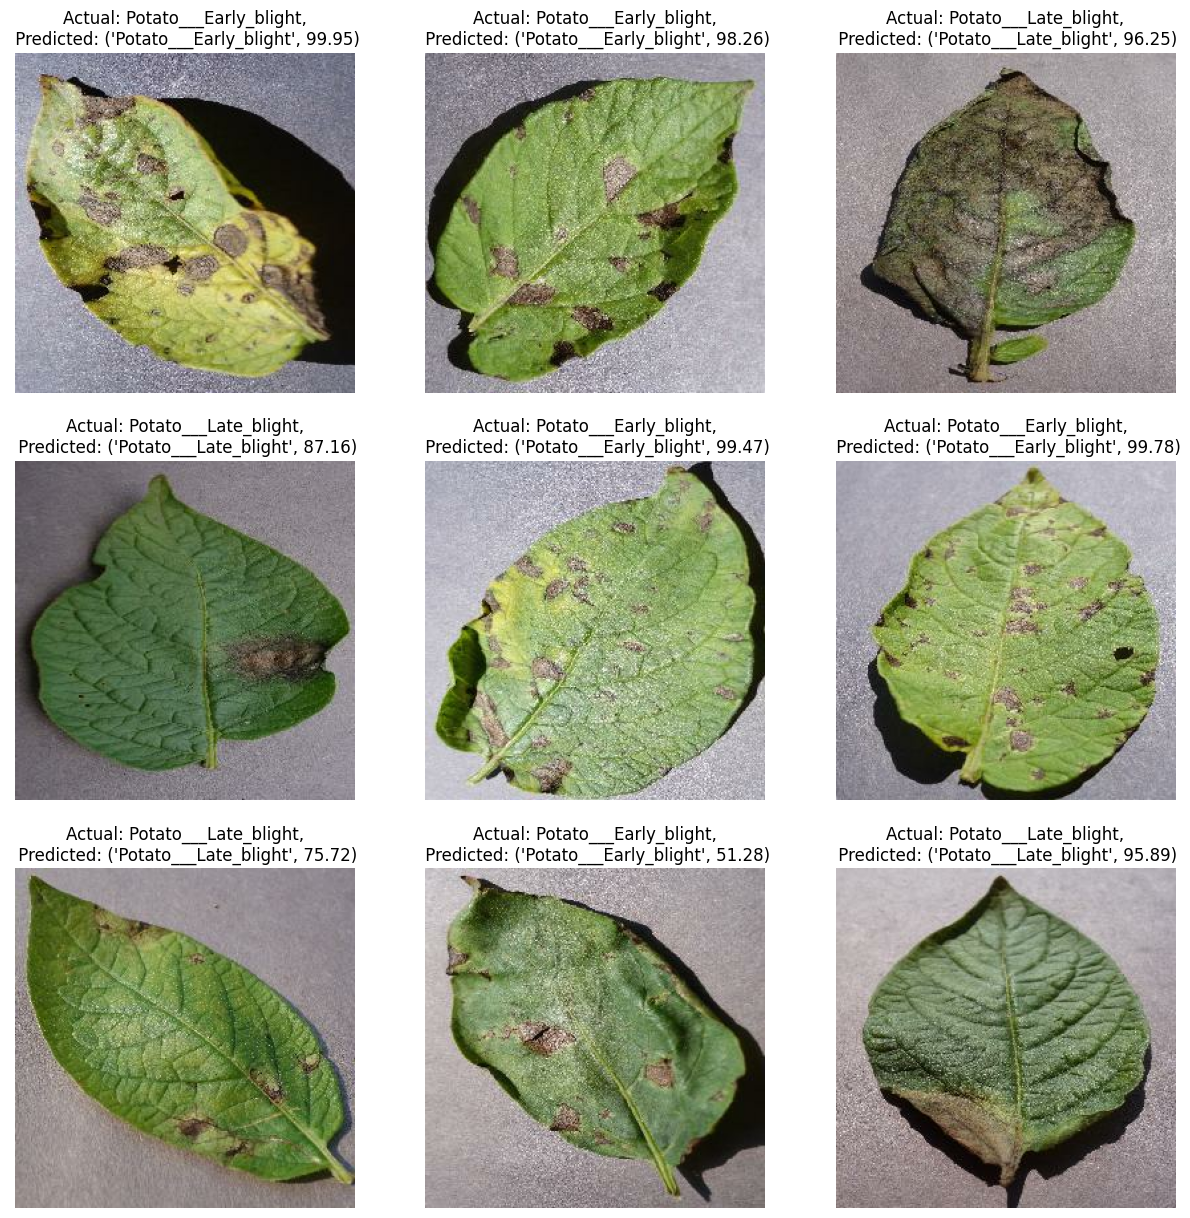

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
for images, labels in test_ds.take(1):
    for i in range(9): 
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        
        
        predicted_class = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}")
        
        plt.axis("off")

        
        
        
    

In [37]:
model_version = 1
model.save(r"C:\Users\Jamshaid\Desktop\jupyter notebook\models\{1}")

INFO:tensorflow:Assets written to: C:\Users\Jamshaid\Desktop\jupyter notebook\models\{1}\assets


INFO:tensorflow:Assets written to: C:\Users\Jamshaid\Desktop\jupyter notebook\models\{1}\assets


In [39]:
model_version =2
model.save(r"C:\Users\Jamshaid\Desktop\jupyter notebook\models\{2}")

INFO:tensorflow:Assets written to: C:\Users\Jamshaid\Desktop\jupyter notebook\models\{2}\assets


INFO:tensorflow:Assets written to: C:\Users\Jamshaid\Desktop\jupyter notebook\models\{2}\assets


In [40]:
model_version =2
model.save(r"C:\Users\Jamshaid\Desktop\jupyter notebook\models\{3}")

INFO:tensorflow:Assets written to: C:\Users\Jamshaid\Desktop\jupyter notebook\models\{3}\assets


INFO:tensorflow:Assets written to: C:\Users\Jamshaid\Desktop\jupyter notebook\models\{3}\assets


ERROR: Could not find a version that satisfies the requirement tensorflow==2.5.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.14.0rc0, 2.14.0rc1)
ERROR: No matching distribution found for tensorflow==2.5.0
